In [4]:
# read data, compulsory
import json

import torch

# variables
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_checkpoint.pt'

data = torch.load(ckpt_path)
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['state_dict', 'loss', 'val_loss_list', 'targets'])


In [5]:
# calculate dummy loss, compulsory
ds_path = '../../data/dataset_close_1.json'

# variables
dataset_name = 'soqy'


with open(ds_path) as f:
    dataset = json.load(f)
all_labels = [d[-1] for d in dataset[dataset_name]]
print(min(all_labels), sum(all_labels)/len(all_labels), max(all_labels))
all_labels = torch.tensor(all_labels).float()
dummy = float((all_labels - all_labels.mean()).abs().mean())
print(dummy)

0.0 0.3930338049143715 3.02
0.268688827753067


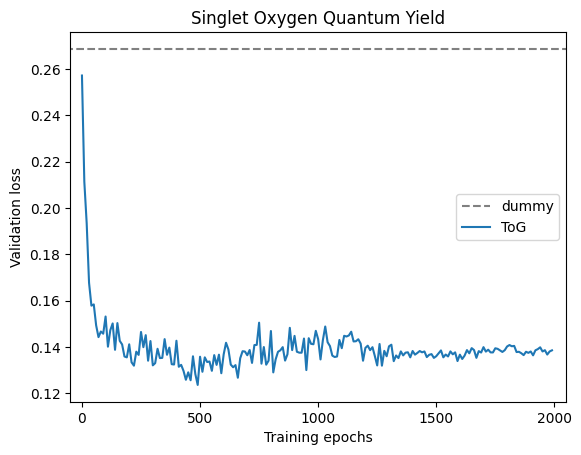

FileNotFoundError: [Errno 2] No such file or directory: 'val_loss_soqy.png'

<Figure size 640x480 with 0 Axes>

In [6]:
# plot val loss, compulsory
from matplotlib import pyplot as plt

# variables
val_freq = 10
title = 'Singlet Oxygen Quantum Yield'
save_path = 'val_loss_soqy.png'
x_range = (-50, 2050)

xs = [i*val_freq for i in range(len(data['val_loss_list']))]
x_dummy = [i*val_freq for i in range(-len(data['val_loss_list']), int(len(data['val_loss_list'])*1.5))]
plt.plot(x_dummy, [dummy]*len(x_dummy), linestyle='--', color='grey', label='dummy')
plt.plot(xs, data['val_loss_list'], label='ToG')
plt.xticks([i*500 for i in range(5)])
plt.xlabel('Training epochs')
plt.ylabel('Validation loss')
plt.xlim(x_range)
plt.title(title)
plt.legend()
plt.show()
plt.savefig(save_path)